In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# os.getcwd()

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# From 02-data-preparation.ipynb
df = pd.read_csv(filepath_or_buffer="../data/cardataset/data.csv", header=0, sep=",")

df.columns = df.columns.str.lower().str.replace(pat=' ',repl='_')

cols = df.dtypes[df.dtypes=='object'].index
for col in cols:
    df[col] = df[col].str.lower().str.replace(pat=' ',repl='_')

print(df.shape)
display(df.head())

(11914, 16)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

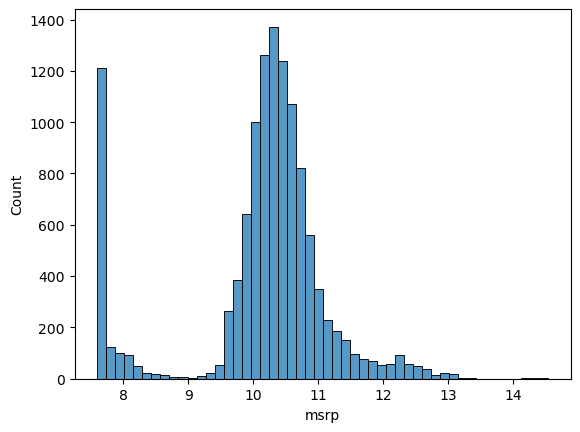

In [5]:
# From 02-eda.ipynb
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

log_msrp = np.log1p(df['msrp'])

sns.histplot(log_msrp, bins=50)

missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


In [6]:
# From 02-validation-framework.ipynb
n = len(df)
n_valid = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_valid - n_test
print(f"n_train: {n_train}, n_valid: {n_valid}, n_test: {n_test}")

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_valid = df.iloc[idx[n_train:n_train+n_valid]]
df_test = df.iloc[idx[n_train+n_valid:]]
print(f"df_train: {len(df_train)}, df_valid: {len(df_valid)}, df_test: {len(df_test)}")

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['msrp'].values)
y_valid = np.log1p(df_valid['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']

n_train: 7150, n_valid: 2382, n_test: 2382
df_train: 7150, df_valid: 2382, df_test: 2382


In [7]:
# From 02-linear-regression.ipynb
w0 = 7.17
wi = [0.01, 0.04, 0.002]

def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred += wi[j]*xi[j]
    return pred

xi = [453, 11, 86]
pred = linear_regression(xi) # this prediction is at a log scale; also, we have used log1p
print(f"g(xi): {pred}")
pred = np.expm1(pred)
print(f"Predicted car price: {pred}")

g(xi): 12.312
Predicted car price: 222347.2221101062


In [8]:
# From 02-linear-regression.ipynb
w0 = 7.17
wi = [0.01, 0.04, 0.002]


def dot(wi, xi):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += wi[j]*xi[j]
    return res

def linear_regression(wi, xi):
    return w0 + dot(wi, xi)

xi = [453, 11, 86]
print(f"g(xi): {linear_regression(wi, xi)}")


g(xi): 12.312000000000001


In [9]:
# From 02-linear-regression.ipynb
def linear_regression(wi, xi):
    return dot(wi, xi)

xi_new = [1] + xi
wi_new = [w0] + wi
print(f"New g(xi): {linear_regression(wi_new, xi_new)}")

New g(xi): 12.312


In [10]:
# From 02-linear-regression.ipynb
def linear_regression_wx(X, w):
    return w.T.dot(X)

def linear_regression_xw(X, w):
    return X.dot(w)

w = np.array([7.17, 0.01, 0.04, 0.002])
w = w.reshape((4,-1))
X = np.array([[1, 1, 1],[148, 132, 453],[24, 25, 11],[1385, 2031, 86]])
print(f"g(X): {linear_regression_wx(X, w)}")

w = np.array([7.17, 0.01, 0.04, 0.002])
X = np.array([[1, 148, 24, 1385],[1, 132, 25, 2031],[1, 453, 11, 86]])
print(f"g(X): {linear_regression_xw(X, w)}")

g(X): [[12.38  13.552 12.312]]
g(X): [12.38  13.552 12.312]


In [11]:
# From 02-training-linear regression.ipynb
def train_linear_regression(X, y):
    # Add a bias term in the input matrix X
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    # Check for identity
    # print(XTX_inv.dot(XTX))
    w = XTX_inv.dot(X.T).dot(y)
    
    return [w[0], w[1:]] 

# Increase the number of records in X so that m > n to solve the normal equation
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
# Solve for the normal equation
w = train_linear_regression(X, y)
print(f"Intercept: {w[0]}\nWeight for each of the features: {w[1]}")

Intercept: 30009.252922766653
Weight for each of the features: [ -22.78396914 -257.69087426   -2.30322797]


Missing values: 
engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64
RMSE (train): 0.7554192603920132


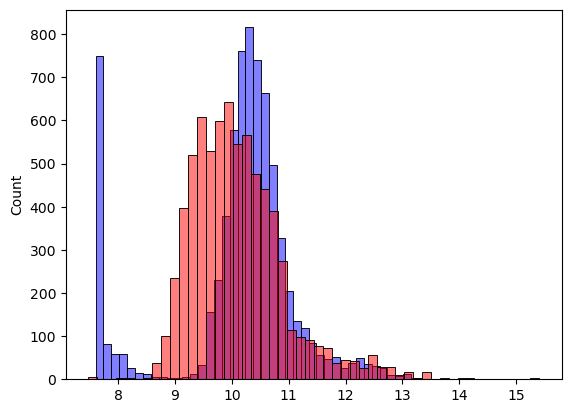

In [12]:
# From 02-car-price-baseline-model.ipynb
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

baseline_cols = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
print(f"Missing values: \n{df_train[baseline_cols].isnull().sum()}")

X_train = df_train[baseline_cols].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

sns.histplot(y_train, bins=50, color="blue", alpha=0.5)
sns.histplot(y_pred, bins=50, color="red", alpha=0.5)

print(f"RMSE (train): {rmse(y=y_train, y_pred=y_pred)}")


In [13]:
# From 02-evaluation-rmse.ipynb
def prepare_x(df, columns):
    df = df[columns]
    df = df.fillna(0).values
    return df

X_train = prepare_x(df_train, baseline_cols)
w0, w = train_linear_regression(X=X_train, y=y_train)
X_valid = prepare_x(df_valid, baseline_cols)
y_train_pred = w0 + X_train.dot(w)
y_valid_pred = w0 + X_valid.dot(w)
print(f"RMSE (train): {rmse(y=y_train, y_pred=y_train_pred)}")
print(f"RMSE (valid): {rmse(y=y_valid, y_pred=y_valid_pred)}")


RMSE (train): 0.7554192603920132
RMSE (valid): 0.7616530991301591


RMSE after feature engineering (train): 0.5175055465840046
RMSE after feature engineering (valid): 0.5172055461058329


<Axes: ylabel='Count'>

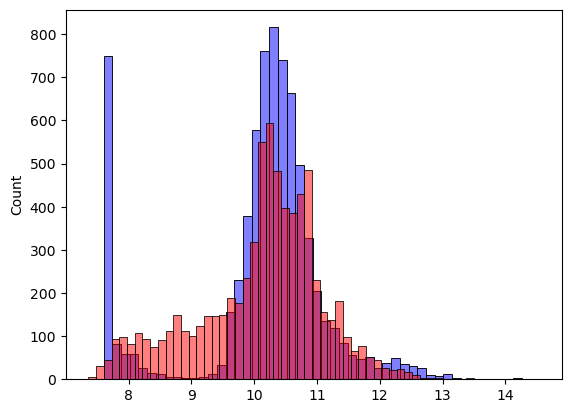

In [ ]:
# Add "age" of the car as a new feature calculated from the model year
def prepare_x_feature(df, columns):
    df = df.copy() # to avoid making modifications to the original dataset
    
    df['age'] = df.year.max() - df.year # calculate the age of the car assuming the max year is when the data was collected
    
    features = columns + ['age']
    df = df[features]
    df = df.fillna(0).values
    return df

X_train = prepare_x_feature(df_train, baseline_cols)
w0, w = train_linear_regression(X=X_train, y=y_train)
X_valid = prepare_x_feature(df_valid, baseline_cols)

y_train_pred = w0 + X_train.dot(w)
y_valid_pred= w0 + X_valid.dot(w)

print(f"RMSE after feature engineering (train): {rmse(y=y_train, y_pred=y_train_pred)}")
print(f"RMSE after feature engineering (valid): {rmse(y=y_valid, y_pred=y_valid_pred)}")

sns.histplot(y_train, bins=50, color="blue", alpha=0.5)
sns.histplot(y_train_pred, bins=50, color="red", alpha=0.5)
